<h1> Volume 02 Computer Vision Basics </h1>

Sequel of the first notebook about computer vision.

These projects aren't as beginner's as the ones in first notebook so I decided split them into another notebook.


Projects on this notebook:

- Skew Correction [IN PROGRESS]
- Detect Templates in Images [IN PROGRESS]
- Watermarking [IN PROGRESS]
- Color Balancing [IN PROGRESS]
- Blur the Face [IN PROGRESS]
- Cartoonize an Image [IN PROGRESS]
- Photo Sketching [IN PROGRESS]
- Generate, Detect and Read QR Code [IN PROGRESS]
- Bar-Code Detection [IN PROGRESS]
- Background Estimation [IN PROGRESS]




<h1>Classic Image Processing Algorithms</h1>


<h3> Color Balancing

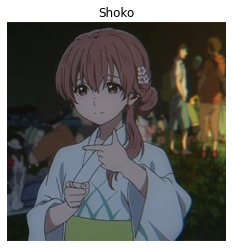

In [9]:

### COLOR BALANCING ###
#Import Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Read Image
img = cv.imread('images/shoko.jpg', cv.IMREAD_COLOR)
gimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


# Result Plots
plt.subplot(2, 4, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Shoko')

plt.rcParams["figure.figsize"] = (18, 9)
plt.show()

<h3> Background Estimation

In [ ]:
# Import Modules
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#Read Capture
cap = cv.VideoCapture('LizWalk.mov')

#Get Random Frames from Video in order to create Background Image
randFrames = cap.get(cv.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=12)

# Create Array with these random images picked out from Video
frames = []
for i in randFrames:
    cap.set(cv.CAP_PROP_POS_FRAMES, i)
    ret, frame = cap.read()
    frames.append(frame)

# Median Frame from random pictures
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)    
#Convert to Gray Scale
gMedianFrame = cv.cvtColor(medianFrame, cv.COLOR_BGR2GRAY)

# Read Video Again
cap.set(cv.CAP_PROP_POS_FRAMES, 1)

# Save it into another video
h , w , l = frame.shape
vid = cv.VideoWriter('LizWalk.avi' , 0 ,30 ,(w,h))

ret = True
while(ret):

    #Read Frame
    ret, framez = cap.read()

    # Get Video Frames to compare with background image and convert to gray Scale
    framezz = cv.cvtColor(framez, cv.COLOR_BGR2GRAY)

    # Calculate difference between Image frame and Median Frame
    dframe = cv.absdiff(framezz, gMedianFrame)

    # Threshold to binarize difference
    th, dframe = cv.threshold(dframe, 30, 255, cv.THRESH_BINARY)
    vid.write(dframe)

    
    


plt.imshow(gMedianFrame, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.title('Liz Walk')


<video controls src="LizWalk.mov" />